# **Análisis de Series de Tiempo con Bitcoin**

Ejemplo para la visualización de la evolución del precio de Bitcoin en el tiempo mediante un análisis temporal, utilizando como base el dataset "Bitcoin Historical Data" obtenido de Kaggle.

In [1]:
!pip install pandas matplotlib seaborn statsmodels scipy sklearn kagglehub

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
# Importaciones
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy.signal import find_peaks
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import kagglehub
import os

In [4]:
# Crear carpeta para credenciales
os.makedirs("/root/.kaggle", exist_ok=True)

In [5]:
# Copiar archivo kaggle API Key
!cp kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
# Descargar el dataset
path = kagglehub.dataset_download("mczielinski/bitcoin-historical-data")
print("Path to dataset files:", path)

100%|██████████| 95.2M/95.2M [00:00<00:00, 165MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mczielinski/bitcoin-historical-data/versions/298


In [7]:
# Cargar el dataset
df = pd.read_csv(f"{path}/btcusd_1-min_data.csv")

In [8]:
# Convertir timestamp a datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], unit='s')
df.set_index("Timestamp", inplace=True)

In [9]:
# Mostrar estructura básica
print(df.shape)

(7120531, 5)


In [10]:
df.head()

,Open,High,Low,Close,Volume
Timestamp,,,,,
2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


In [11]:
# Rellenar valores faltantes
df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-11-717743322.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [12]:
# Agrupar por día (precio de cierre diario promedio)
df_daily = df.resample('D').mean()

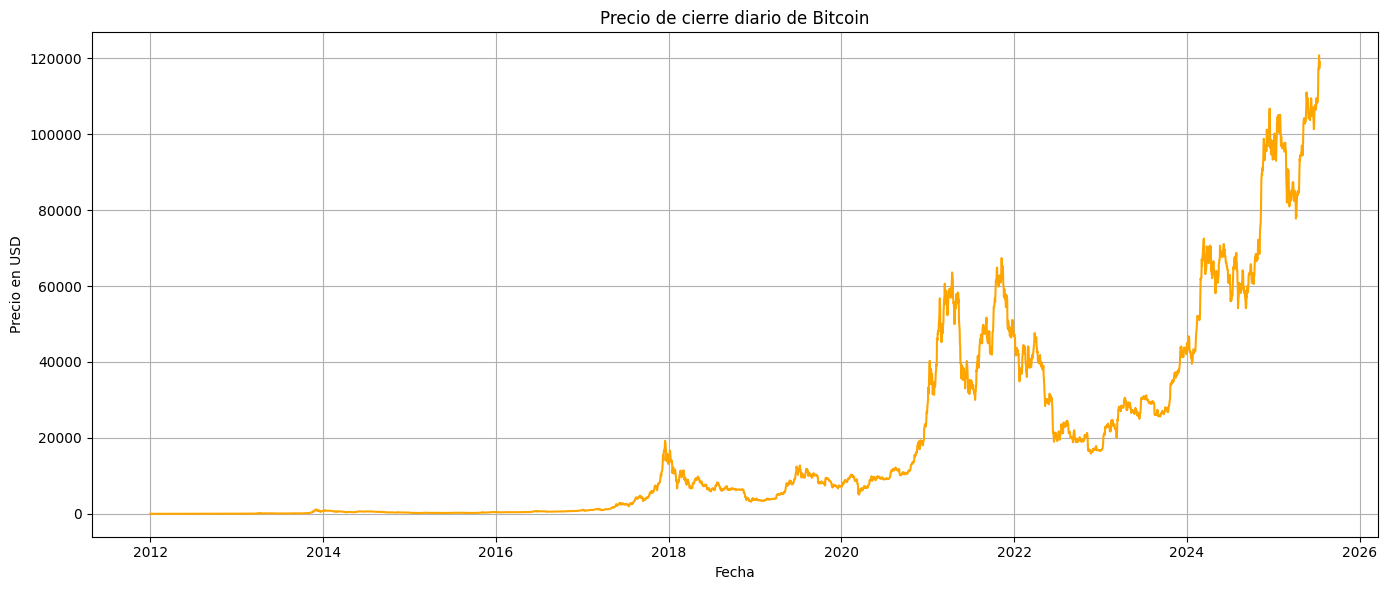

In [13]:
# Visualizar precios de cierre diarios
plt.figure(figsize=(14, 6))
plt.plot(df_daily['Close'], color='orange')
plt.title('Precio de cierre diario de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretación**:

**2012–2016**
- Precio bajo y estable
- En este periodo inicial, el precio estaba por debajo de los `$1,000 USD`.
- La volatilidad era baja comparada con los años siguientes.

**2017**
- Primer gran rally
- El precio sube rápidamente y alcanza los `~$20,000` en diciembre de 2017.
- Luego viene una corrección fuerte en 2018.

**2020–2021**
- Explosión alcista
- Después de la pandemia, el precio sube desde `~$10,000` hasta `~$60,000 USD`.
- Se alcanza un máximo histórico hacia abril de 2021.
- Posteriormente, ocurre una fuerte corrección.

**2023–2025**
- Segunda gran subida
- A partir de 2023 se observa un nuevo rally, más sostenido.
- El precio llega a superar los `$100,000 USD` y sigue en ascenso hacia finales de 2025.
- Se observa alta volatilidad (grandes subidas y bajadas) pero con tendencia ascendente.

Finalmente, se puede concluir que la tendencia a largo plazo es claramente alcista, aunque con muchas oscilaciones intermedias.

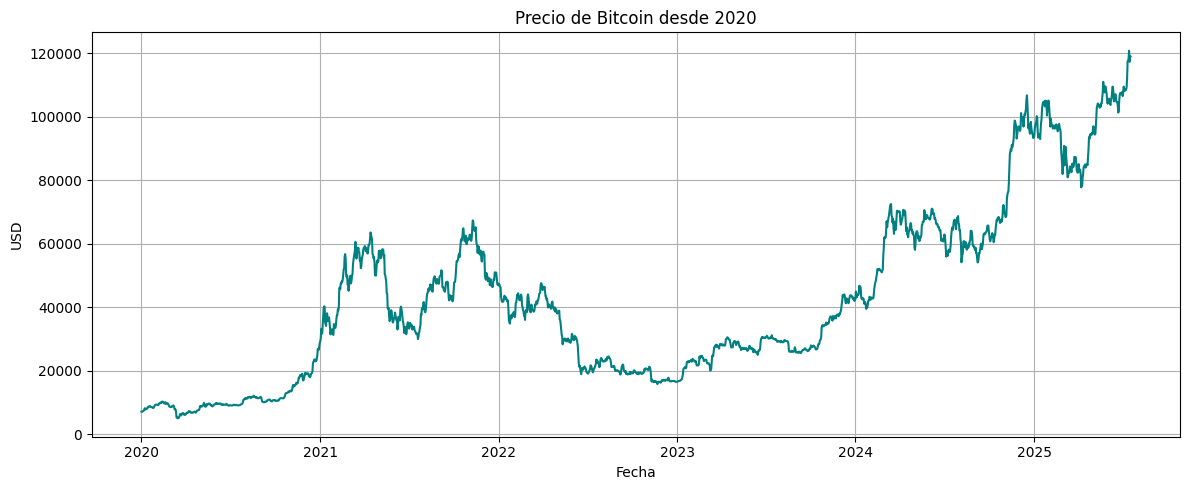

In [14]:
# Visualizar desde 2020 en adelante
df_2020s = df_daily['2020':]

plt.figure(figsize=(12, 5))
plt.plot(df_2020s['Close'], color='teal')
plt.title('Precio de Bitcoin desde 2020')
plt.xlabel('Fecha')
plt.ylabel('USD')
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretación**:

**2020**
- Inicio del rally post-pandemia
- El precio comienza en valores bajos (``~$8,000`–`$10,000 USD`).
- A finales de 2020 comienza una fuerte tendencia alcista, posiblemente por:
  - Aumento del interés institucional
  - Impresión monetaria post-COVID
  - Narrativa de Bitcoin como reserva de valor

**2021**
- Primer gran pico y caída
- Bitcoin alcanza un máximo histórico (`~$64,000 USD` en abril).
- Luego sufre una corrección profunda (`~$30,000`–`$35,000 USD`).
- En octubre-noviembre se da un nuevo pico (`~$66,000`), seguido de otra caída.

**2022**
- Mercado bajista
- Tendencia descendente sostenida, con valores cayendo hasta `~15`–`20 mil USD`.
- Se relaciona con:
  - Crisis en empresas cripto (Terra, Celsius, FTX)
  - Subidas de tasas de interés globales
  - Pérdida de confianza en el ecosistema

**2023–2025**
- Recuperación y segundo gran rally
- Bitcoin rompe la resistencia de `$30,000` en 2023.

**En 2024–2025**
- Sube de forma acelerada hasta alcanzar y superar los `$100,000` USD.
- Se observan varias fases de consolidación y corrección entre subidas.

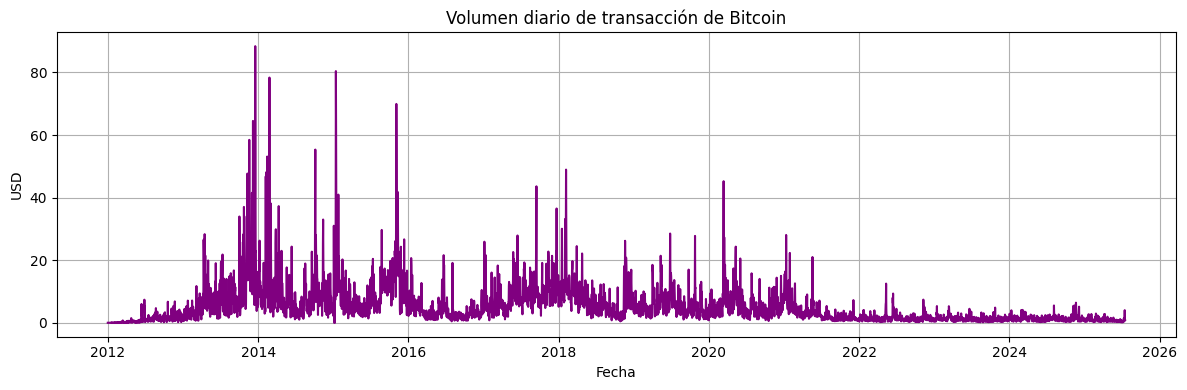

In [15]:
# Visualizar volumen transado
plt.figure(figsize=(12, 4))
plt.plot(df_daily['Volume'], color='purple')
plt.title('Volumen diario de transacción de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('USD')
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretación**:

**2012–2014**
- Aumento inicial
- Se observa un rápido crecimiento del volumen, alcanzando múltiples picos.
- Posiblemente relacionado con el inicio de la adopción masiva, mayor interés público y primeras casas de cambio (exchanges).

**2015–2018**
- Alta volatilidad y múltiples picos
- Aparecen picos extremos en el volumen, pero también muchas oscilaciones bruscas.
- Coincide con el boom del precio de Bitcoin en 2017, lo cual impulsa más actividad.
- Algunas velas altas indican eventos específicos o pánico/compras masivas.

**2019–2021**
- Disminución progresiva
- Aunque Bitcoin alcanzó precios altos en 2021, el volumen ya no es tan explosivo como antes.
- El volumen tiende a ser más estable y bajo, probablemente por:
  - Consolidación del mercado
  - Menor especulación en exchanges pequeños
  - Cambios en cómo se mide el volumen (transparencia, filtros)

**2022–2025**
- Volumen muy bajo y estable
- A pesar de que el precio de Bitcoin sube en este periodo (como vimos en gráficos anteriores), el volumen de transacción parece declinar.
- Esto puede significar:
  - Menor participación especulativa diaria
  - Migración de volumen a otras plataformas no reflejadas en este dataset
  - Uso más institucional o almacenamiento a largo plazo (HODLing)

Finalmente, se puede concluir que la mayor actividad transaccional ocurrió entre 2013 y 2018, con fuertes oscilaciones. Por otro lado, en años recientes (post-2020), la actividad diaria medida como volumen parece mucho más baja.

In [16]:
# Agregar columnas de año y mes
df_daily['year'] = df_daily.index.year
df_daily['month'] = df_daily.index.month

In [17]:
# Usar solo columna 'Close' y reducir a frecuencia diaria
df_daily = df["Close"].resample('D').mean()
df_daily = df_daily.ffill()

In [18]:
# Filtrar desde 2015
df_daily = df_daily["2015":]

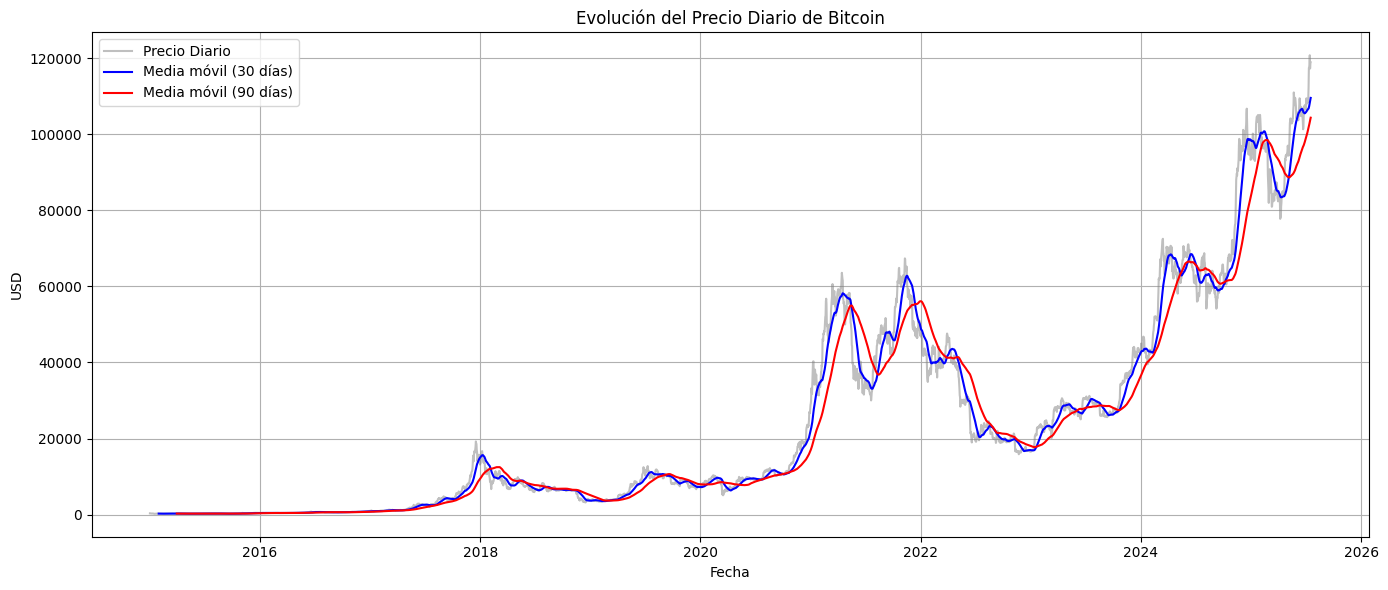

In [19]:
# Visualización medias móviles
plt.figure(figsize=(14, 6))
plt.plot(df_daily, label="Precio Diario", color="gray", alpha=0.5)
plt.plot(df_daily.rolling(30).mean(), label="Media móvil (30 días)", color="blue")
plt.plot(df_daily.rolling(90).mean(), label="Media móvil (90 días)", color="red")
plt.title("Evolución del Precio Diario de Bitcoin")
plt.xlabel("Fecha")
plt.ylabel("USD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretación**:

**Precio Diario (línea gris)**

Representa el precio real de Bitcoin para cada día desde 2015 hasta 2025.
Es muy volátil: subidas y bajadas bruscas, especialmente en 2017, 2021 y 2024.

**Media Móvil de 30 días (línea azul)**

Calcula el promedio de los últimos 30 días para cada punto. Muestra una versión suavizada de corto plazo de la serie original.

Permite:

- Identificar cambios recientes de tendencia (por ejemplo, cuando sube o baja repentinamente)
- Filtrar el ruido diario

**Media Móvil de 90 días (línea roja)**

Calcula el promedio de los últimos 90 días, por lo tanto, es más lenta en reaccionar a los cambios. Refleja la tendencia general de largo plazo. En este caso:

- Cuando la media de 30 días (azul) cruza hacia arriba a la de 90 días (roja), puede ser una señal de compra (inicio de tendencia alcista).
- Cuando cruza hacia abajo, puede ser una señal de venta (inicio de tendencia bajista).

Por otro lado, se puede observar:

- En el periodo 2017–2018 se tuvo el primer gran ciclo alcista seguido de caída fuerte.
- En el periodo 2020–2021	se tuvo una fuerte subida post-pandemia, luego corrección.
- En el periodo 2023–2025	se tuvo claramente una nueva fase alcista

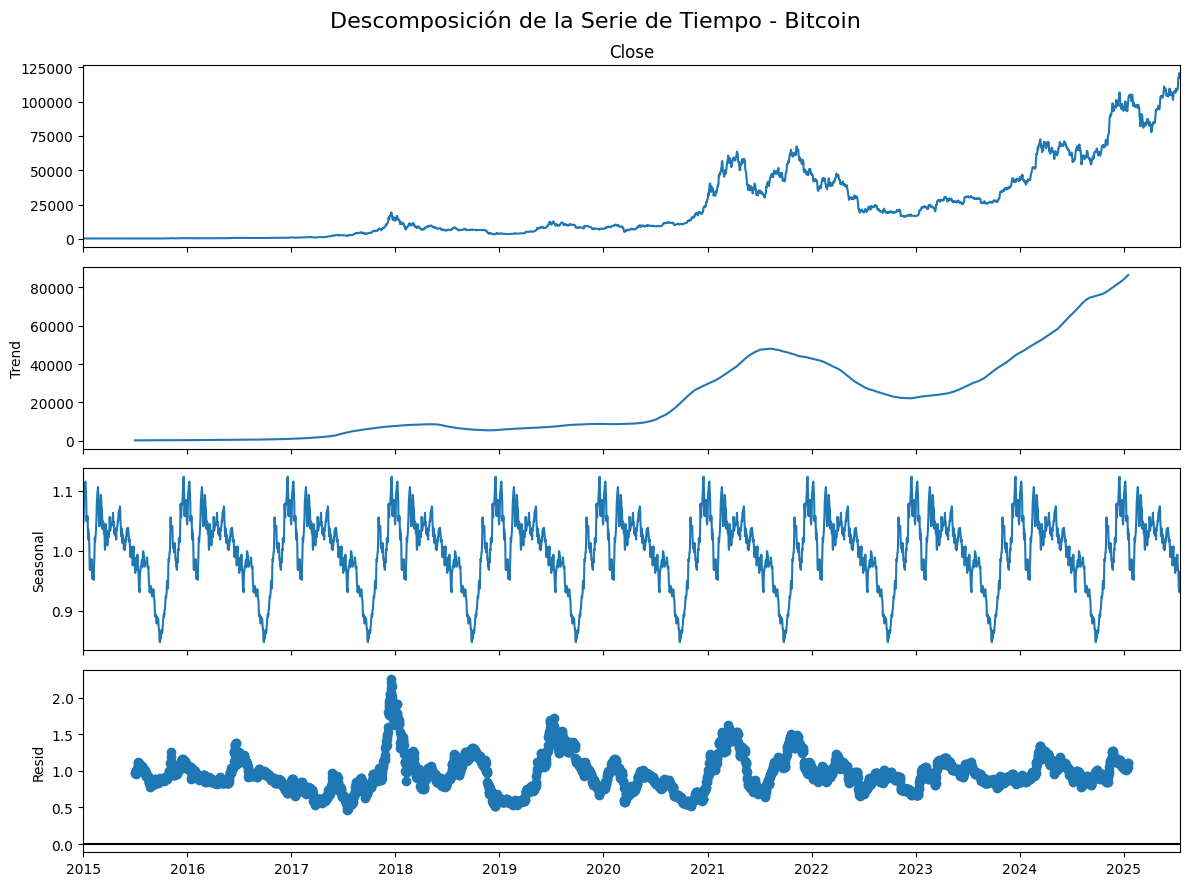

In [20]:
# Descomposición de la serie (tendencia, estacionalidad y ruido)
result = seasonal_decompose(df_daily, model='multiplicative', period=365)

plt.rcParams.update({'figure.figsize': (12, 9)})
result.plot()
plt.suptitle("Descomposición de la Serie de Tiempo - Bitcoin", fontsize=16)
plt.tight_layout()
plt.show()

**Interpretación**:

**Close (Serie original)**

Muestra la evolución real del precio diario de Bitcoin desde 2015 hasta 2025. Se observan varias fases:

- Aumento progresivo hasta finales de 2017
- Corrección en 2018
- Estancamiento hasta finales de 2020
- Gran subida en 2021
- Corrección y nuevo repunte hacia 2024–2025

**Trend (Tendencia)**

Es la dirección general a largo plazo de la serie, eliminando fluctuaciones de corto plazo. En este caso:

- La tendencia es plana hasta ~2017
- Luego sube fuertemente en 2021–2022
- Cae un poco en 2022 y vuelve a subir en 2023–2025

Esta curva suaviza los picos y valles para revelar la dirección global del mercado.

**Seasonal (Estacionalidad)**

Representa los patrones cíclicos repetitivos a lo largo del tiempo (por ejemplo, variaciones anuales, mensuales, etc). En este caso:

- Hay una oscilación cíclica anual, aunque sutil (entre ~0.9 y 1.1)
- Esto indica que hay alguna repetitividad anual en el comportamiento del precio, pero no muy pronunciada

La estacionalidad en Bitcoin suele ser más débil que en otras series (como ventas minoristas o clima), pero aún puede haber patrones en ciertos meses o estaciones.

**Resid (Ruido o Residuos)**

Son las fluctuaciones aleatorias que no se explican ni por la tendencia ni por la estacionalidad. En este caso:

- Hay más residuo (variación) en períodos de alta volatilidad, como 2017–2018 y 2021
- Las variaciones parecen más controladas en otros períodos

Este componente mide cuánto ruido o error queda en la serie luego de separar la tendencia y estacionalidad.

In [21]:
# Calcular correlación entre precio de cierre y volumen
corr = df['Close'].corr(df['Volume'])
print(f"Correlación entre precio y volumen: {corr:.4f}")

Correlación entre precio y volumen: -0.0909


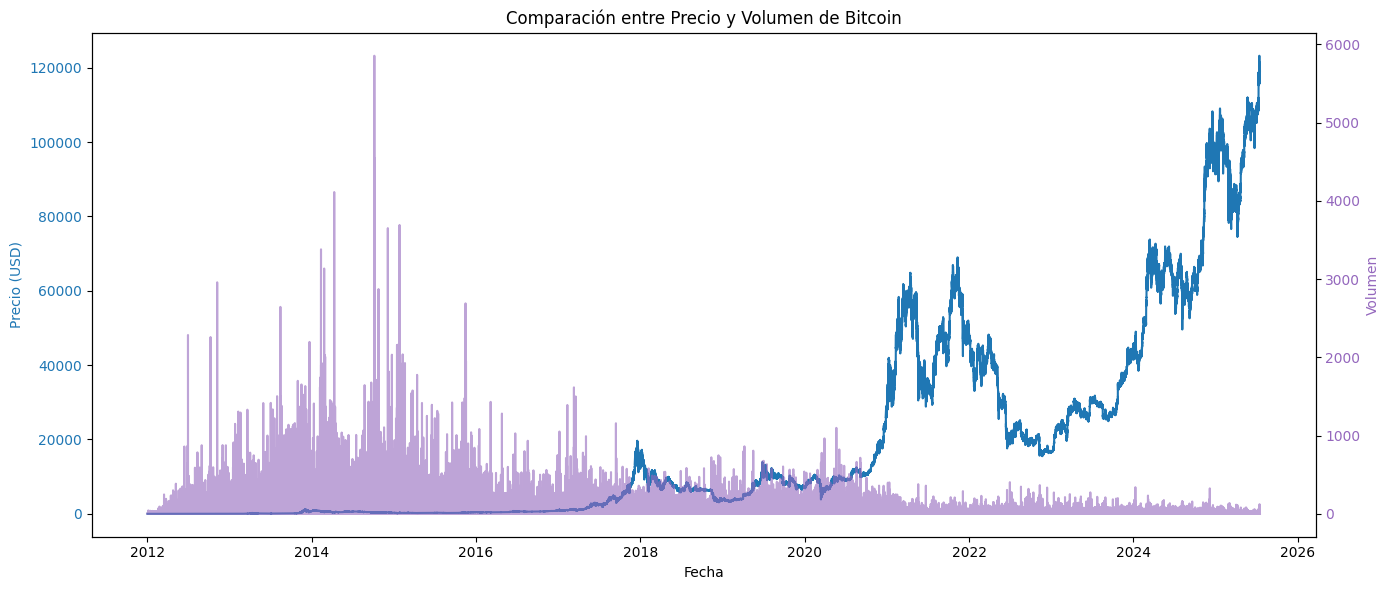

In [22]:
# Comparar volumen vs precio
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio (USD)', color='tab:blue')
ax1.plot(df.index, df['Close'], color='tab:blue', label='Precio')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Volumen', color='tab:purple')
ax2.plot(df.index, df['Volume'], color='tab:purple', alpha=0.6, label='Volumen')
ax2.tick_params(axis='y', labelcolor='tab:purple')

plt.title('Comparación entre Precio y Volumen de Bitcoin')
fig.tight_layout()
plt.show()

**Interpretación**:

**Línea azul (Precio de Bitcoin)**
- Se observa una tendencia de crecimiento exponencial desde 2017, con algunos ciclos de burbuja:
  - Aumentos abruptos entre 2017, 2020 y 2024
  - Caídas posteriores por correcciones del mercado

**Barras violetas (Volumen)**
- Volumen más alto entre 2012 y 2015, con múltiples picos extremos
- A partir de 2016, el volumen disminuye paulatinamente
- Aunque el precio sube, el volumen no crece en proporción
- Esto puede reflejar:
  - Reducción de operaciones especulativas diarias
  - Cambios en los exchanges
  - Transacciones fuera de exchanges (OTC, custodios, wallets privadas)

Se puede observar lo siguiente:

**2013–2015**
- Volumen muy alto, pero precio bajo
- Primeras etapas de adopción

**2017**
- Ambos suben
- Aumento de interés especulativo

**2020–2021**
- Precio crece, pero volumen se mantiene bajo
- Interés institucional

**2024–2025**
- Precio alcanza máximos, pero volumen sigue bajo o plano

Esto sugiere que el precio ya no depende tanto del volumen diario, posiblemente porque:
- Hay menos rotación de monedas (más holders de largo plazo)
- Hay transacciones grandes que no se reflejan como volumen visible

In [23]:
df_daily = df.resample('D').mean()
df_2019s = df_daily[:'2019']
df_2020s = df_daily['2020':]

In [24]:
# Detectar picos en el precio de cierre (2012-2019)
peaks, _ = find_peaks(df_2019s['Close'], distance=20)
troughs, _ = find_peaks(-df_2019s['Close'], distance=20)  # Mínimos

In [25]:
# Seleccionar los 5 picos y 5 valles más extremos ---
top_peaks = df_2019s['Close'].iloc[peaks].sort_values(ascending=False).head(5)
top_troughs = df_2019s['Close'].iloc[troughs].sort_values().head(5)

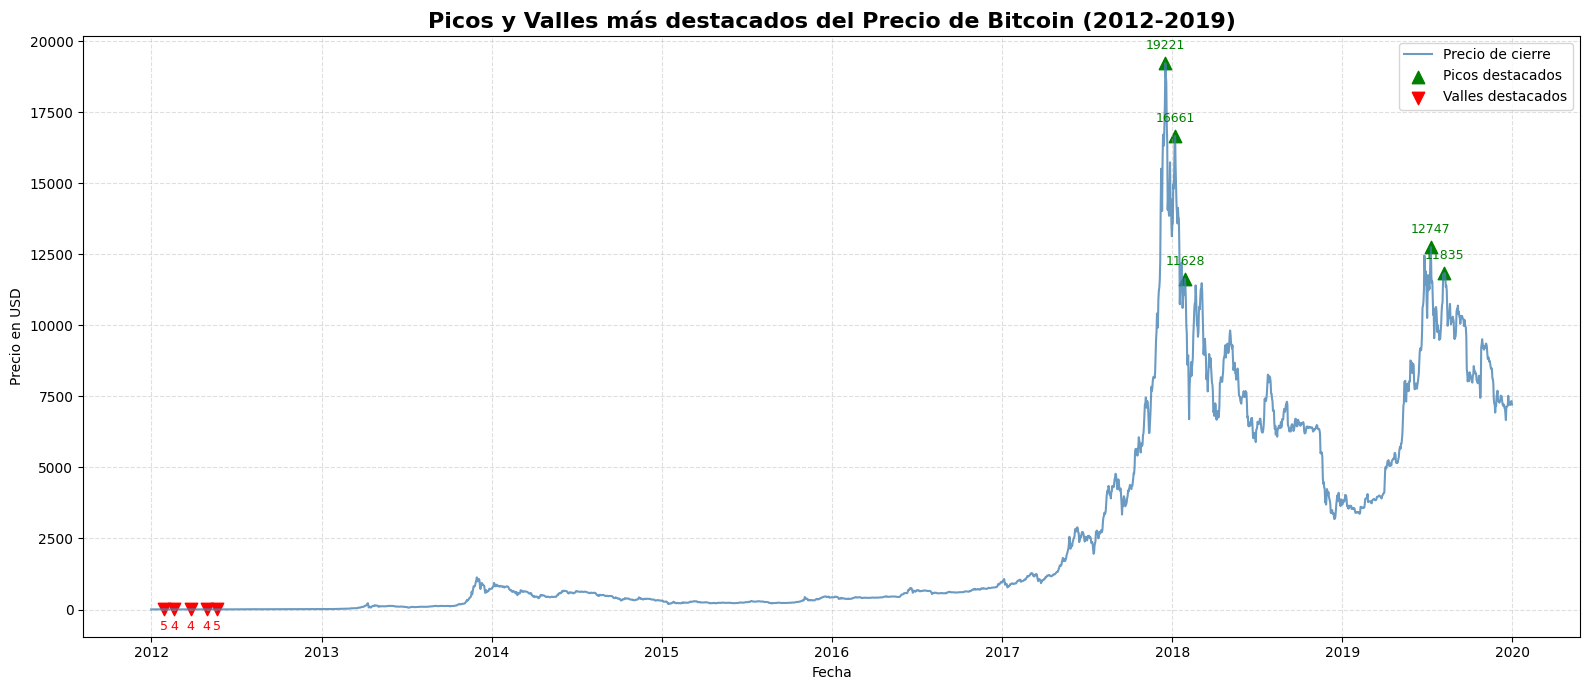

In [26]:
# Graficar picos locales
plt.figure(figsize=(16, 7))
plt.plot(df_2019s.index, df_2019s['Close'], color='steelblue', linewidth=1.5, alpha=0.8, label='Precio de cierre')

# Añadir solo los 5 picos y 5 valles más significativos
plt.scatter(top_peaks.index, top_peaks.values, color='green', s=80, marker='^', label='Picos destacados')
plt.scatter(top_troughs.index, top_troughs.values, color='red', s=80, marker='v', label='Valles destacados')

# Anotar los valores
for idx in top_peaks.index:
    plt.annotate(f'{int(df_2019s["Close"].loc[idx])}',
                 (idx, df_2019s['Close'].loc[idx]),
                 textcoords="offset points",
                 xytext=(0, 10), ha='center', fontsize=9, color='green')

for idx in top_troughs.index:
    plt.annotate(f'{int(df_2019s["Close"].loc[idx])}',
                 (idx, df_2019s['Close'].loc[idx]),
                 textcoords="offset points",
                 xytext=(0, -15), ha='center', fontsize=9, color='red')

# Personalización
plt.title('Picos y Valles más destacados del Precio de Bitcoin (2012-2019)', fontsize=16, weight='bold')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

**Interpretación**:

**Tendencia general del precio**
- Desde 2012 hasta 2017: crecimiento paulatino con algunas pequeñas burbujas.
- En 2017, el precio explotó hasta alcanzar su primer máximo histórico (`~$19,221`).
- Luego cayó bruscamente en 2018, seguido de una recuperación parcial en 2019.

**Picos destacados**
- Indican momentos de máximos relativos donde el precio tocó un techo y luego descendió.
- Por ejemplo, los picos:
  - `~$19,221` en diciembre de 2017 (máximo histórico de esa época).
  - `~$16,661` y `~$12,747` representan otros techos de mercado.

**Valles destacados**
- Representan mínimos relativos, posibles oportunidades de entrada o fases de fuerte corrección.
- En este gráfico, los valles más bajos están en los primeros años (2012), con precios tan bajos como `$4` o `$5`.

In [27]:
# Detectar picos en el precio de cierre (2020-2025)
peaks, _ = find_peaks(df_2020s['Close'], distance=20)
troughs, _ = find_peaks(-df_2020s['Close'], distance=20)  # Mínimos

In [28]:
# Seleccionar los 5 picos y 5 valles más extremos ---
top_peaks = df_2020s['Close'].iloc[peaks].sort_values(ascending=False).head(5)
top_troughs = df_2020s['Close'].iloc[troughs].sort_values().head(5)

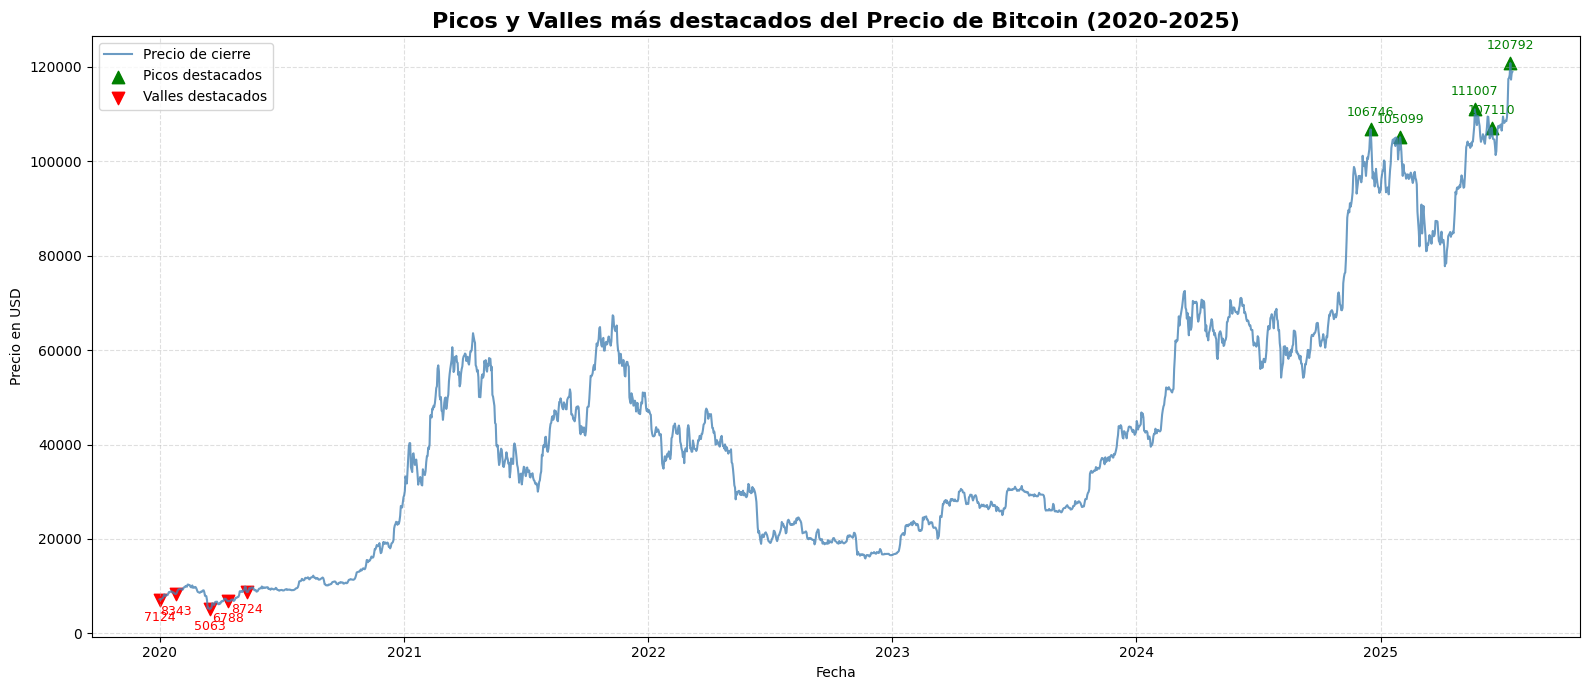

In [29]:
# Graficar picos locales
plt.figure(figsize=(16, 7))
plt.plot(df_2020s.index, df_2020s['Close'], color='steelblue', linewidth=1.5, alpha=0.8, label='Precio de cierre')

# Añadir solo los 5 picos y 5 valles más significativos
plt.scatter(top_peaks.index, top_peaks.values, color='green', s=80, marker='^', label='Picos destacados')
plt.scatter(top_troughs.index, top_troughs.values, color='red', s=80, marker='v', label='Valles destacados')

# Anotar los valores
for idx in top_peaks.index:
    plt.annotate(f'{int(df_2020s["Close"].loc[idx])}',
                 (idx, df_2020s['Close'].loc[idx]),
                 textcoords="offset points",
                 xytext=(0, 10), ha='center', fontsize=9, color='green')

for idx in top_troughs.index:
    plt.annotate(f'{int(df_2020s["Close"].loc[idx])}',
                 (idx, df_2020s['Close'].loc[idx]),
                 textcoords="offset points",
                 xytext=(0, -15), ha='center', fontsize=9, color='red')

# Personalización
plt.title('Picos y Valles más destacados del Precio de Bitcoin (2020-2025)', fontsize=16, weight='bold')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

**Interpretación**:

**Picos destacados (máximos locales)**

Estas son fechas donde el precio alcanzó un máximo relevante antes de una caída posterior. Algunos ejemplos:
- **Finales de 2021**: ~66,000
- **Mediados de 2024**: ~106,746
- **Inicio de 2025**: ~120,792

Estos momentos reflejan fases de euforia en el mercado, posiblemente influidos por factores como:
- Noticias macroeconómicas.
- Halving de Bitcoin.
- Aumento en demanda institucional.
- Entrada de nuevos inversores.

**Valles destacados (mínimos locales)**

Son puntos donde el precio alcanzó un piso antes de comenzar a subir. Por ejemplo:
- **Marzo 2020**: ~5,063
- **Mediados de 2022**: ~17,000

Estos valles suelen coincidir con fases de corrección o crisis, como:
- COVID-19 (marzo 2020).
- Recesión de mercado de criptomonedas (2022).

In [32]:
# Escalar el volumen
scaler = StandardScaler()
df['Volume_scaled'] = scaler.fit_transform(df[['Volume']])

In [33]:
# Aplicar KMeans con 2 clusters (bajo/alto volumen)
kmeans = KMeans(n_clusters=2, random_state=0)
df['volume_cluster'] = kmeans.fit_predict(df[['Volume_scaled']])

In [34]:
# Etiquetar los clusters como 'Alto' y 'Bajo'
mean_vol_cluster = df.groupby('volume_cluster')['Volume'].mean()
cluster_map = {
    mean_vol_cluster.idxmin(): 'Bajo volumen',
    mean_vol_cluster.idxmax(): 'Alto volumen'
}
df['volume_cluster_label'] = df['volume_cluster'].map(cluster_map)

In [35]:
# Agregar media móvil de volumen
df['Volume_MA'] = df['Volume'].rolling(window=30).mean()

/tmp/ipython-input-36-1076317971.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


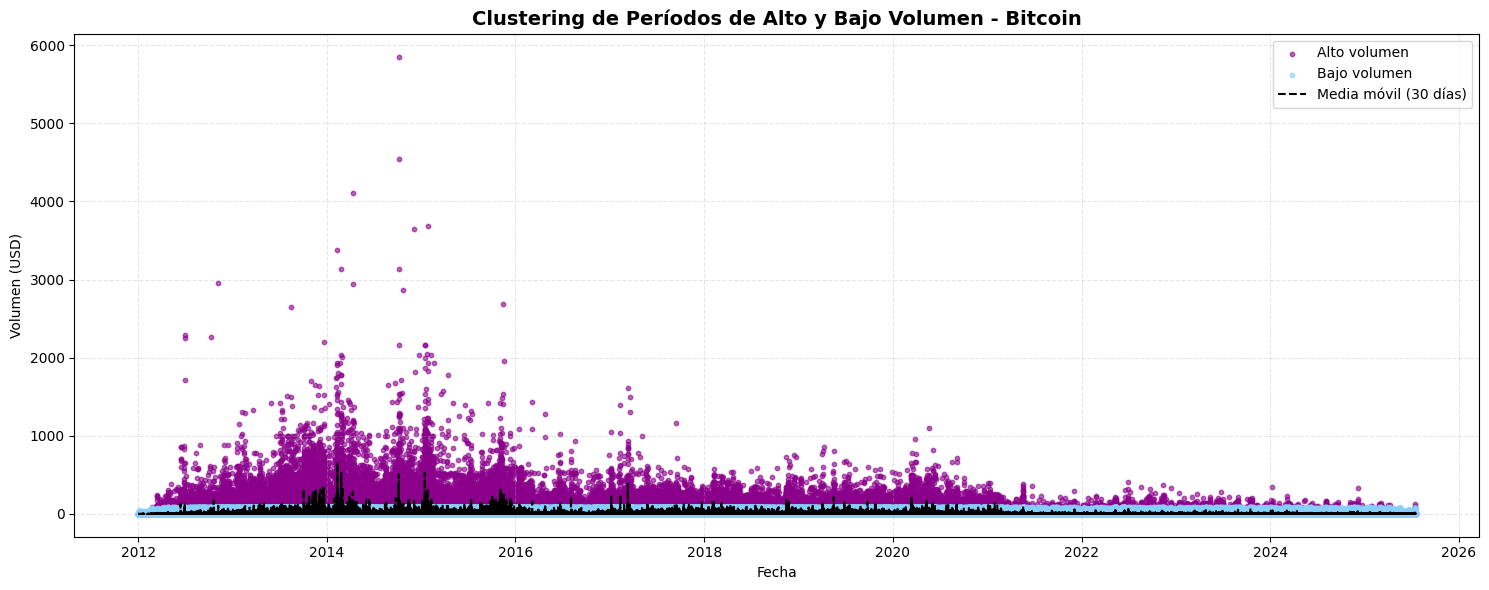

In [36]:
plt.figure(figsize=(15, 6))
colors = {'Alto volumen': '#8B008B', 'Bajo volumen': '#87CEFA'}

# Graficar puntos por cluster
for label, color in colors.items():
    subset = df[df['volume_cluster_label'] == label]
    plt.scatter(
        subset.index,
        subset['Volume'],
        label=label,
        color=color,
        s=10,
        alpha=0.6
    )

# Graficar la media móvil del volumen
plt.plot(df.index, df['Volume_MA'], color='black', linestyle='--', linewidth=1.5, label='Media móvil (30 días)')

# Ajustes de presentación
plt.title("Clustering de Períodos de Alto y Bajo Volumen - Bitcoin", fontsize=14, fontweight='bold')
plt.xlabel("Fecha")
plt.ylabel("Volumen (USD)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

**Interpretación**:

**Puntos de colores**:

- **Púrpura (Alto volumen)**: días identificados como de alto volumen mediante clustering (KMeans). Días con volumen significativamente más alto (probablemente relacionados con eventos de mercado, noticias o pánico/optimismo).

- **Azul claro (Bajo volumen)**: días de bajo volumen.

- **Línea negra punteada**: Media móvil de 30 días del volumen, usada para suavizar la tendencia general del volumen a lo largo del tiempo.

En este caso se puede observar que entre 2013 y 2016 se tuvo una gran cantidad de picos de volumen, con alta dispersión.

Por otro lado, a partir de 2017, el volumen se estabiliza, y los puntos de alto volumen disminuyen en número y se concentran más cerca del promedio.